In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
model = ChatOpenAI()

In [3]:
class BlogState(TypedDict):

    title:str
    outline:str
    content:str

In [4]:
def create_outline(state: BlogState) -> BlogState:

    title = state['title']

    prompt = f'Generate a detailed outline for the blog on the topic - {title}'
    outline = model.invoke(prompt).content

    state['outline'] = outline

    return state

In [5]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the following outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

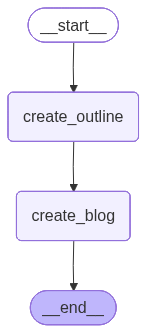

In [7]:
graph = StateGraph(BlogState)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

workflow = graph.compile()
graph.compile()

In [10]:
initial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state['content'])

Artificial Intelligence (AI) has been a hot topic in recent years, with its potential to revolutionize various industries. In India, the rise of AI technology has been nothing short of remarkable. From startups to government initiatives, the country has been taking strides towards embracing AI and leveraging its capabilities for economic growth and innovation.

I. Introduction

A. AI technology refers to the simulation of human intelligence in machines that are programmed to think and act like humans. It encompasses a range of technologies, including machine learning, natural language processing, robotics, and more.

B. AI has the potential to bring about significant advancements in various industries, such as healthcare, finance, agriculture, and manufacturing. It can improve efficiency, accuracy, and decision-making processes, leading to better outcomes for businesses and society as a whole.

C. The growth of AI in India has been steadily increasing, with more companies and organizat